In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

In [2]:
df = pd.read_csv('diabetes.csv')

print("Veri setinin ilk 5 satırı:")
df.head()

Veri setinin ilk 5 satırı:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Veri seti hakkında genel bilgi:")
df.info()

# Veri setinin istatistiksel özeti
print("\nVeri setinin istatistiksel özeti:")
df.describe()

Veri seti hakkında genel bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Veri setinin istatistiksel özeti:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


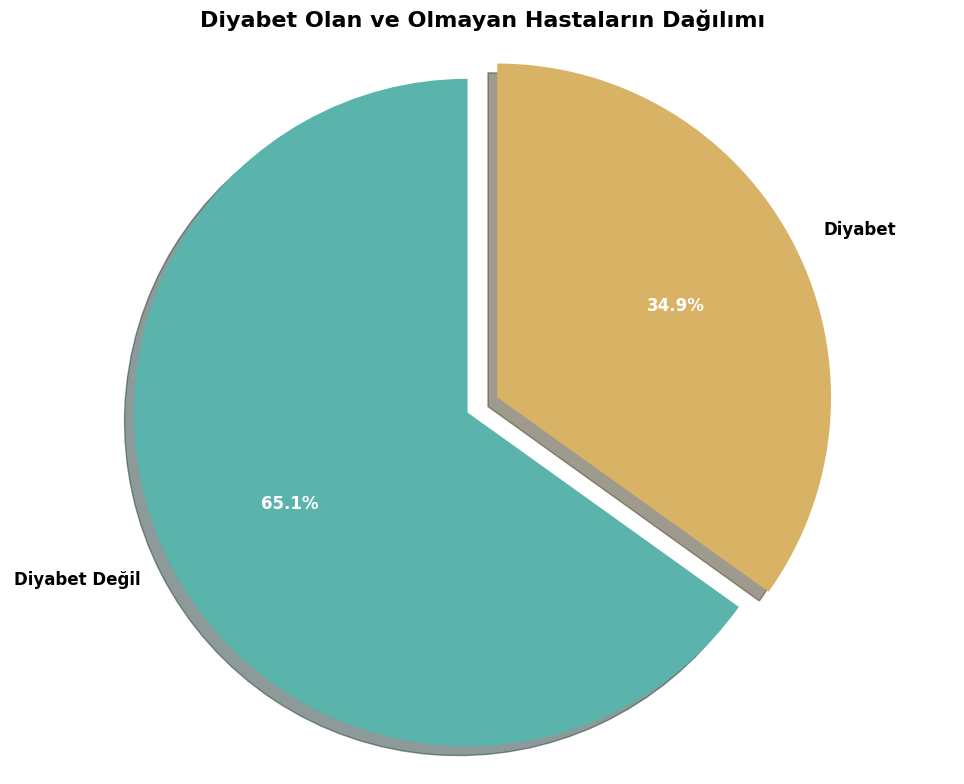

In [5]:
#Pasta Grafiği
# Diyabet olan ve olmayan hastaların sayısını hesaplama
outcome_counts = df['Outcome'].value_counts()
labels = ['Diyabet Değil', 'Diyabet']
sizes = outcome_counts.values
percentages = [f'{(size/sum(sizes)*100):.1f}%' for size in sizes]

# Renk paleti
colors = ['#5ab4ac', '#d8b365']


plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(sizes, 
                                   explode=explode,
                                   labels=labels,
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=90,
                                   textprops={'fontsize': 12})

# Renk değiştirme
for text in texts:
    text.set_color('black')
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Grafik başlığı
plt.title('Diyabet Olan ve Olmayan Hastaların Dağılımı', fontsize=16, fontweight='bold')
plt.axis('equal') 

plt.tight_layout()
plt.show()

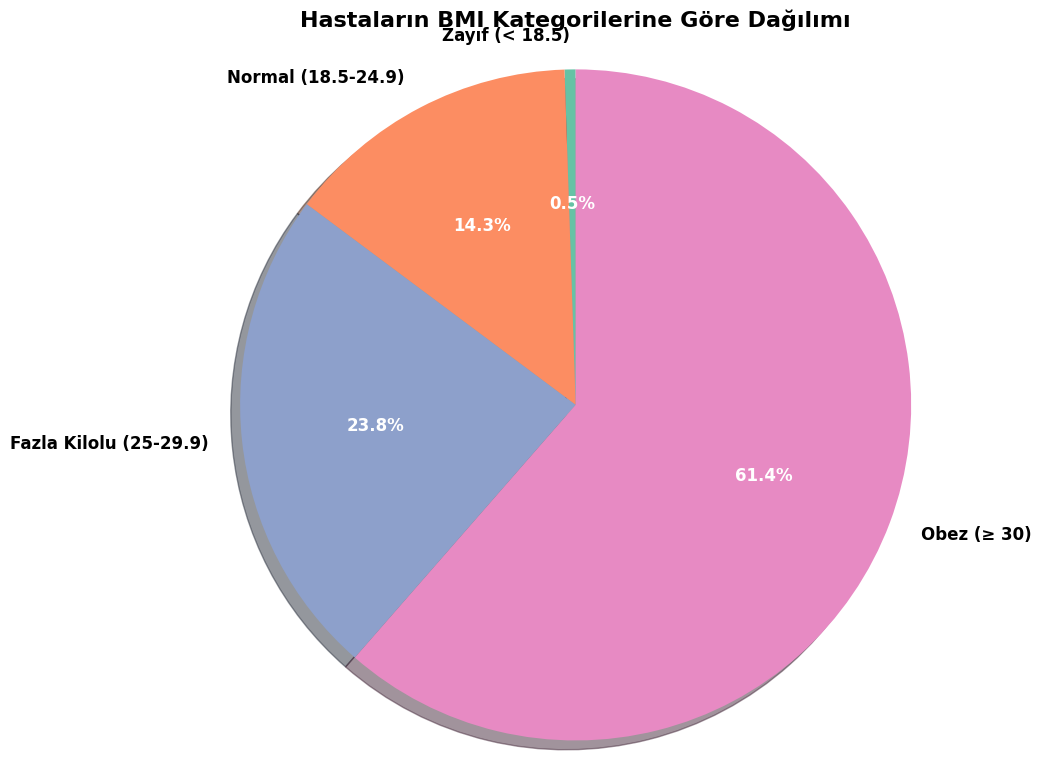

In [6]:
bmi_categories = [
    'Zayıf (< 18.5)',
    'Normal (18.5-24.9)',
    'Fazla Kilolu (25-29.9)',
    'Obez (≥ 30)'
]

df['BMI_Category'] = pd.cut(
    df['BMI'],
    bins=[0, 18.5, 25, 30, float('inf')],
    labels=bmi_categories
)

bmi_counts = df['BMI_Category'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(
    bmi_counts.values,
    labels=bmi_counts.index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=sns.color_palette("Set2"),
    textprops={'fontsize': 12}
)

for text in texts:
    text.set_color('black')
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Hastaların BMI Kategorilerine Göre Dağılımı', fontsize=16, fontweight='bold')
plt.axis('equal') 

plt.tight_layout()
plt.show()

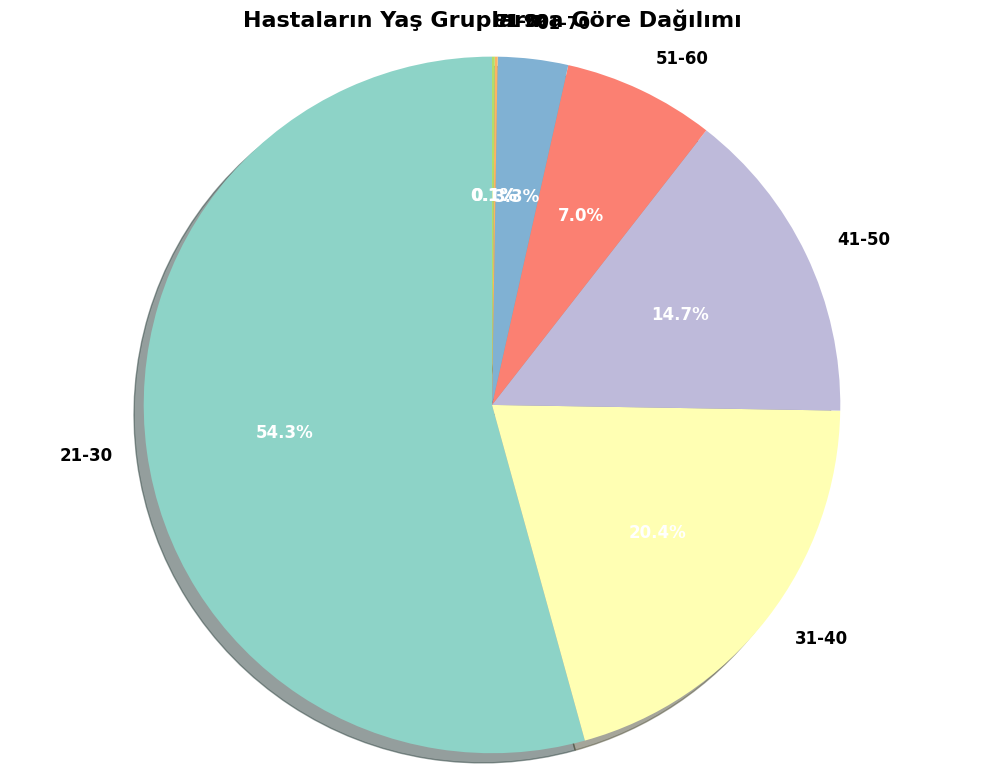

In [7]:
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[20, 30, 40, 50, 60, 70, 80, 90],
    labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
)

age_counts = df['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(
    age_counts.values,
    labels=age_counts.index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=sns.color_palette("Set3"),
    textprops={'fontsize': 12}
)

for text in texts:
    text.set_color('black')
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Hastaların Yaş Gruplarına Göre Dağılımı', fontsize=16, fontweight='bold')
plt.axis('equal') 

plt.tight_layout()
plt.show()